<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-изучение-данных" data-toc-modified-id="Подготовка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Обработка-пропусков-и-проблемных-значений" data-toc-modified-id="Обработка-пропусков-и-проблемных-значений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков и проблемных значений</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Описание-подхода-к-решению-задачи" data-toc-modified-id="Описание-подхода-к-решению-задачи-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описание подхода к решению задачи</a></span></li><li><span><a href="#Исследование-моделей-без-учета-дисбаланса-классов" data-toc-modified-id="Исследование-моделей-без-учета-дисбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование моделей без учета дисбаланса классов</a></span></li><li><span><a href="#Исследование-моделей-с-учетом-дисбаланса-классов" data-toc-modified-id="Исследование-моделей-с-учетом-дисбаланса-классов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование моделей с учетом дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#Учет-дисбаланса-классов" data-toc-modified-id="Учет-дисбаланса-классов-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Учет дисбаланса классов</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#kNN-Classifier" data-toc-modified-id="kNN-Classifier-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>kNN Classifier</a></span></li></ul></li></ul></li><li><span><a href="#Выбор-финальной-модели" data-toc-modified-id="Выбор-финальной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор финальной модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Прогноз оттока клиентов банка

Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

**Цель:** нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.  

**Целевой признак модели:** факт ухода клиента (Exited).

*Примечание от заказчика:* нужно довести *F1*-меру как минимум до значения 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Exited — факт ухода клиента

## Подготовка и изучение данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import product

# import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# import other tools
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [2]:
# set up the workspace
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_rows', 50)

In [3]:
# load the data
users = pd.read_csv('/datasets/Churn.csv')

users.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8.000,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7.000,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4.000,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4.000,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2.000,134603.880,1,1,1,71725.730,0


In [4]:
display(users.info())
display(users.describe())
users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,9091.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,4.998,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.895,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,2.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


0

- Есть пропуски в столбце Tenure
- Проблемных значений не обнаружено
- Полных дубликатов не обнаружено

### Обработка пропусков и проблемных значений

In [5]:
users.isna().mean()

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.091
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

- Были рассмотрены распределения количественных признаков для строк, где в столбце Tenure пропуски, и где их нет: все распределения очень сильно похожи и имеют схожие статистики
- Для категориальных признаков были построены столбчатые диаграммы для этих же двух групп данных: пропорции количества объектов каждой группы для каждого признака очень схожи
- Нет очевидной зависимости появляения пропусков
- Допустим, что пропуски в столбце Tenure наиболее вероятно могут быть для тех клиентов, которые только начали пользоваться услугами банка, либо еще на стадии оформления определенных документов, поэтому им либо забыли поставить значение 0 (что является кодом для срока меньше 1 года), либо из-за особенности системы обработки данных не было проставлено значение
- Заполним пропуски в столбце Tenure значением 0

In [6]:
users.Tenure.fillna(0, inplace=True)
users.isna().mean()

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

### Исследовательский анализ данных

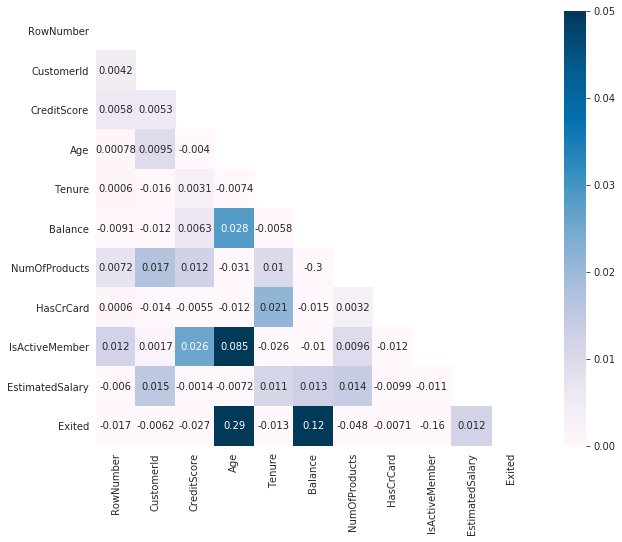

In [7]:
mask = np.triu(users.corr())
fig = plt.subplots(figsize=(12, 8))
sns.heatmap(users.corr(), 
            annot=True, 
            cmap= 'PuBu', 
            square=True, 
            mask=mask, 
            vmin=0, 
            vmax=0.05
           )
plt.show()

- Коэффициент корреляции редко превышает 0.05, доходя максимум до 0.29 - линейных зависимостей в данных нет
- Посмотрим матрицу диаграмм рассеяния для разных групп клиентов по целевому признаку, чтобы поподробнее взглянуть на зависимости в данных и оценить возможные нелинейные зависимости

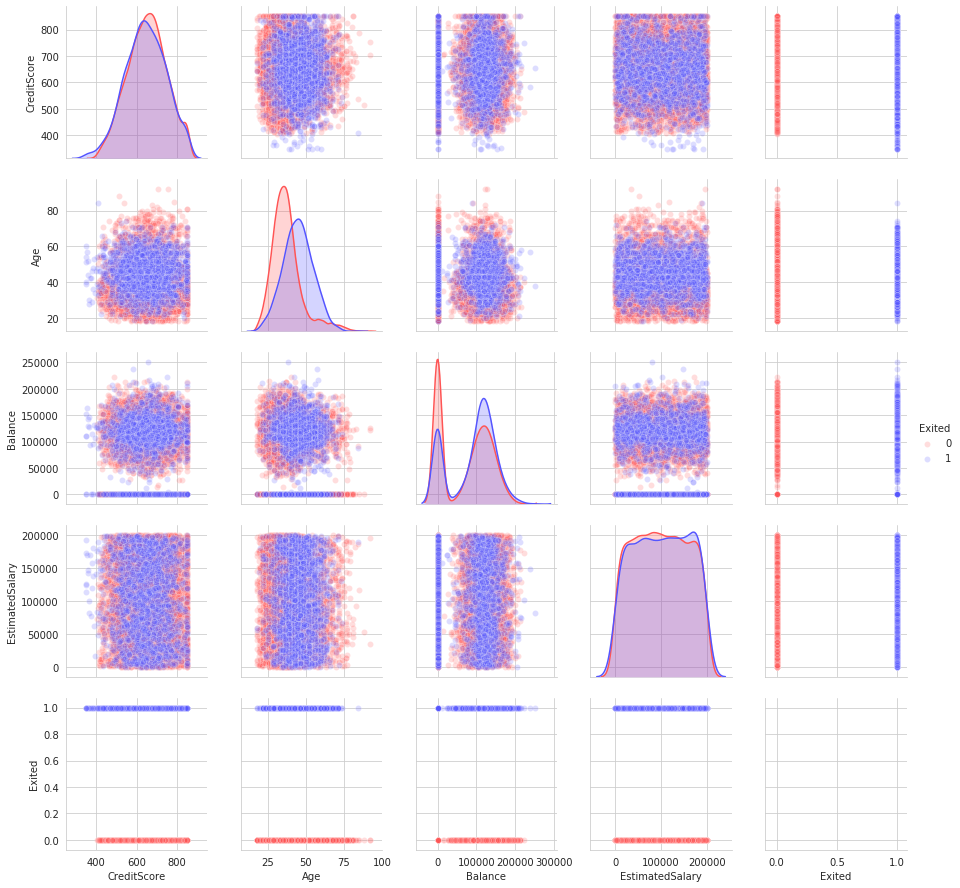

In [8]:
sns.pairplot(users[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], 
             hue='Exited', 
             plot_kws={'alpha': .2},
             palette='seismic_r'
            )
plt.show()

- Очевидных нелинейных зависимостей также не наблюдается
- Данные по клиентам, ушедшим и не ушедшим от банка накладываются, нет очевидных разделений по парам признаков
- Различаются распределения по возрасту: для клиентов, которые ушли, распределение практически нормальное и медиана смещена в сторону бОльших значений (медиана около 45-50 лет) по сранвению с медианой распределения клиентов, которые не ушли (медиана около 30-35). К тому же у группы клиентов, которые не ушли, наблюдает хвост из больших значений
- Также различия в рапределениях есть по признаку Balance. С одной стороны, для обеих групп целевого признака наблюдается одинаковая форма распределения значений признака баланса счета, где наблюдается два пика: первый около нуля, второй в районе 140 тысяч, а также одинаковые статистики. С другой стороны, если мы проанализируем каждый из пиков, можно заметить, что доля клиентов с нулевым балансом счета преобладает в группе клиентов, которые не ушли, в то время, как в группе клиентов, кто ушел, преобладают те, у кого был ненулевой баланс счета

### Вывод

- Проблемные значений и дубликаты не найдены, пропущенные значения обработаны
- Очевидные корреляции в данных не найдены
- Группы целевого признака различаются по возрасту и по балансу счета. Вероятно эти признаки будут играть бОльшую роль в алгоритмах классификации. Но стоит также помнить, что группы целевого признака неодинаково представлены в выборке

## Исследование моделей

### Описание подхода к решению задачи

- Целевой признак показывает, ушел клиент из банка или нет. Наличие двух классов у целевого признака говорит нам о задачи бинарной классификации. Обучим следующие модели:
    - DecisionTreeClassifier
    - RandomForestClassifier
    - LogisticRegression
    - KNeighborsClassifier
- Качество моделей будем оценивать F-1 мерой и ROC AUC

- Исследуем баланс классов и попробуем обучить модель без учета дисбаланса
- Сначала разделим выборку на обучающую и тестовую (25%) с использованием стратификации
- Будем использовать RandomizedSearchCV для настройки гиперпараметров
- Уберем из признаков столбцы RowNumber и CustomerId, т.к. это данные, созданные банком и никак не отражающие реальные свойства исследуемых объектов. Также уберем признак Surname, т.к., во-первых, вряд ли фамилия влияет на то, уйдет человек из банка или нет, во-вторых, очень много уникальных значений у этого признака, и прямое кодирование даст огромное количество дамми признаков.
- Также сразу же закодируем наши категориальные переменные прямым кодированием

In [9]:
seed = 24
cv_k = 5
scoring = 'f1'
scoring_alt = 'roc_auc'

users_ohe = pd.get_dummies(users.drop('Surname', axis=1), drop_first=True) # кодируем категориальные признаки

x = users_ohe.drop(['RowNumber', 'CustomerId', 'Exited'], axis=1) # датафрейм с признаками
y = users.loc[:, 'Exited'] # серия с целевым признаком

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=seed, 
                                                    stratify=y
                                                   )

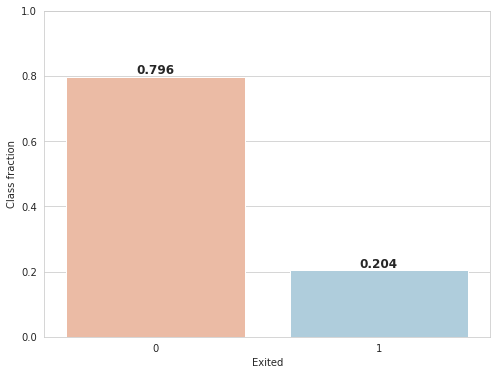

In [10]:
ax, fig = plt.subplots(figsize=(8, 6))
bar = sns.barplot(users.Exited.value_counts(normalize=True).index, 
                  users.Exited.value_counts(normalize=True),
                  palette='RdBu'
                 )

for index, frac in users.Exited.value_counts(normalize=True).iteritems():
    bar.text(index, 
             frac+0.01, 
             round(frac,3), 
             fontsize=12,
             fontweight='bold',
             ha='center'
            )

plt.xlabel('Exited')
plt.ylabel('Class fraction')
plt.ylim([0, 1])
plt.show()

- В нашем датасете значительно меньше клиентов, которые ушли из банка

### Исследование моделей без учета дисбаланса классов

- Обучим модель RandomForestClassifier без учета дисбаланса

In [11]:
hyperparams_rf = {'max_depth': np.arange(1, 11),
                  'n_estimators': np.arange(10, 51, 10),
                  'criterion': ['gini', 'entropy']
                 }

rf = RandomForestClassifier(random_state=seed)
rf_gscv = RandomizedSearchCV(rf, 
                             hyperparams_rf, 
                             cv=cv_k, 
                             scoring=scoring, 
                             random_state=seed
                            )
rf_gscv.fit(x_train, y_train)

rf_gscv_best_params = rf_gscv.best_params_
rf_gscv_best_model = rf_gscv.best_estimator_
rf_gscv_validation_score = rf_gscv.best_score_

y_pred_rf = rf_gscv_best_model.predict(x_test)
rf_gscv_test_score_f1 = f1_score(y_test, y_pred_rf)
rf_gscv_test_score_roc_auc = roc_auc_score(y_test, y_pred_rf)

print(f'Выбранные гиперпараметры: {rf_gscv_best_params}')
print(f'{scoring} на валидационной выборке: {round(rf_gscv_validation_score, 3)}')

print(f'{scoring} на тестовой выборке: {round(rf_gscv_test_score_f1, 3)}')
print(f'{scoring_alt} на тестовой выборке: {round(rf_gscv_test_score_roc_auc, 3)}')

Выбранные гиперпараметры: {'n_estimators': 40, 'max_depth': 10, 'criterion': 'gini'}
f1 на валидационной выборке: 0.575
f1 на тестовой выборке: 0.555
roc_auc на тестовой выборке: 0.7


- И по валидационной и по тестовой выборкам значение меры f1 **меньше требуемых 0.59**, значение roc auc по тестовой выборке равно 0.7
- Чтобы улучшить качество модели надо учесть дисбаланс классов

### Исследование моделей с учетом дисбаланса классов

#### Учет дисбаланса классов

- Побробуем три метода борьбы с дисбалансом:
    1. Использование весов для классов
    2. Downsampling
    3. Upsampling

In [12]:
def downsample(x, y, fraction):
    """
    производит downsampling выборки
    
    params:
    x - массив значений признаков
    y - массив значений целевого признака
    fraction - доля отобранных значений
    
    returns:
    x_downsampled, y_downsampled - ресемплированные массивы значений признаков и целевого признака соответственно
    """
    
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    x_downsampled = pd.concat([x_zeros.sample(frac=fraction, random_state=seed)] + [x_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=seed)] + [y_ones])
    
    x_downsampled, y_downsampled = shuffle(x_downsampled, y_downsampled, random_state=seed)
    
    return x_downsampled, y_downsampled

In [13]:
def upsample(x, y, rate):
    """
    производит upsampling выборки
    
    params:
    x - массив значений признаков
    y - массив значений целевого признака
    rate - множитель для минорного класса (метка класса = 1)
    
    returns:
    x_upsampled, y_upsampled - ресемплированные массивы значений признаков и целевого признака соответственно
    """
    
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    x_upsampled = pd.concat([x_zeros] + [x_ones] * rate)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * rate)
    
    x_upsampled, y_upsampled = shuffle(x_upsampled, y_upsampled, random_state=seed)
    
    return x_upsampled, y_upsampled

- Если для данных применяется апсэмплинг/даунсэмплинг для решения проблемы дисбаланса классов, то нужно делать сэмплинг только на обучающей выборке и не нарушать баланс на выборках, предназначенных для проверки качество моделей, поэтому не совсем корректно использовать объекты типа Grid/RandomSearchCV, т.к. мы не можем контролировать операции с разными выборками
- Для более точного подбора гиперпараметров с помощью кросс-валидации и более точно обучения модели будем получать разбиение на фолды для кросс-валидации с помощью объекта KFold, который возвращает индексы обучающей и валидационной выборок для всех фолдов для заданного количества разбиений. Затем для каждого разбиения:
    1. Для каждого разбиения сэмплировать будем **только обучающую выборку** 
    2. Обучаем модель по сэмплированной выборке
    3. Проверяем качество модели по несэмплированной валидационной выборке и сохраняем значение в отдельный массив
    4. Находим среднее значений метрики по всем разбиениям
- Напишем функции для подсчета качества модели с использованием ап- и даунсэмплинга, функция будет возвращать значения двух метрик f1 и roc auc с правильным использованием кросс-валидации
- Затем с использованием этих функций сделаем ручную подборку гиперпараметров
- Модель с лучшими параметрами обучим на семплированной исходной обучающей выборке
- Качество модели проверим на тестовой выборке

In [14]:
# создаем объект kfold
kf = KFold(n_splits=cv_k, shuffle=False)

In [15]:
def score_downsampled_model(model, params, x_train_sam, y_train_sam, kf, down_frac):
    
    f1_scores = []
    roc_auc_scores = []
    

    for train_fold_index, val_fold_index in kf.split(x_train_sam, y_train_sam):
        x_train_fold, y_train_fold = x_train_sam.iloc[train_fold_index], y_train_sam.iloc[train_fold_index]
        x_val_fold, y_val_fold = x_train_sam.iloc[val_fold_index], y_train_sam.iloc[val_fold_index]

        x_train_fold_downsample, y_train_fold_downsample = downsample(x_train_fold, y_train_fold, down_frac)
        
        model_obj = model(**params).fit(x_train_fold_downsample, y_train_fold_downsample)
        
        f1 = f1_score(y_val_fold, model_obj.predict(x_val_fold))
        roc_auc = roc_auc_score(y_val_fold, model_obj.predict(x_val_fold))
        
        f1_scores.append(f1)
        roc_auc_scores.append(roc_auc)
    return round(np.array(f1_scores).mean(), 3), round(np.array(roc_auc_scores).mean(), 3)

In [16]:
def score_upsampled_model(model, params, x_train_sam, y_train_sam, kf, up_rate):
    
    f1_scores = []
    roc_auc_scores = []

    for train_fold_index, val_fold_index in kf.split(x_train_sam, y_train_sam):
        x_train_fold, y_train_fold = x_train_sam.iloc[train_fold_index], y_train_sam.iloc[train_fold_index]
        x_val_fold, y_val_fold = x_train_sam.iloc[val_fold_index], y_train_sam.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = upsample(x_train_fold, y_train_fold, up_rate)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        f1 = f1_score(y_val_fold, model_obj.predict(x_val_fold))
        roc_auc = roc_auc_score(y_val_fold, model_obj.predict(x_val_fold))
        
        f1_scores.append(f1)
        roc_auc_scores.append(roc_auc)
    return round(np.array(f1_scores).mean(), 3), round(np.array(roc_auc_scores).mean(), 3)

In [17]:
# сэмплируем исходную обучающую выборку для обучения лучшей модели, выбранной на основе ручного подбора
x_train_down, y_train_down = downsample(x_train, y_train, 0.4)
x_train_up, y_train_up = upsample(x_train, y_train, 3)

#### Decision Tree Classifier

---
**Присвоение весов классам**

In [18]:
hyperparams_dt = {'max_depth': np.arange(1, 11),
                  'min_samples_leaf': np.arange(1, 11),
                  'max_features': np.arange(1, len(x.columns)),
                  'criterion': ['gini', 'entropy']
                 }

dt = DecisionTreeClassifier(random_state=seed, class_weight='balanced')
dt_cv = RandomizedSearchCV(dt, 
                           hyperparams_dt, 
                           cv=cv_k, 
                           scoring=scoring,
                           random_state=seed
                          )
dt_cv.fit(x_train, y_train)

dt_cv_best_params = dt_cv.best_params_
dt_cv_best_model = dt_cv.best_estimator_
dt_cv_validation_score = dt_cv.best_score_

y_pred_dt = dt_cv_best_model.predict(x_test)
dt_cv_test_score_f1 = f1_score(y_test, y_pred_dt)
dt_cv_test_score_roc_auc = roc_auc_score(y_test, y_pred_dt)

print(f'Выбранные гиперпараметры: {dt_cv_best_params}')
print(f'{scoring} на валидационной выборке: {round(dt_cv_validation_score, 3)}')

print(f'{scoring} на тестовой выборке: {round(dt_cv_test_score_f1, 3)}')
print(f'{scoring_alt} на тестовой выборке: {round(dt_cv_test_score_roc_auc, 3)}')

Выбранные гиперпараметры: {'min_samples_leaf': 7, 'max_features': 6, 'max_depth': 4, 'criterion': 'gini'}
f1 на валидационной выборке: 0.552
f1 на тестовой выборке: 0.547
roc_auc на тестовой выборке: 0.737


- При использовании весов для классов значение f1-меры по тестовой выборке **0.547**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59

---
**Downsampling**

In [19]:
hyperparams_dt = {'max_depth': np.arange(2, 8),
                  'min_samples_leaf': np.arange(1, 9),
                  'max_features': np.arange(1, 8),
                  'criterion': ['gini', 'entropy']
                 }

down_dt_models = []

for max_depth, min_samples_leaf, max_features, criterion in product(hyperparams_dt['max_depth'],
                                                                    hyperparams_dt['min_samples_leaf'],
                                                                    hyperparams_dt['max_features'],
                                                                    hyperparams_dt['criterion']
                                                                   ):
    case_params = {'max_depth': max_depth,
                   'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features,
                   'criterion': criterion,
                   'random_state': seed
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_downsampled_model(DecisionTreeClassifier,
                                                                                case_params, 
                                                                                x_train, 
                                                                                y_train, 
                                                                                kf, 
                                                                                0.4
                                                                               )
    down_dt_models.append(case_params)

In [20]:
best_down_dt_models = sorted(down_dt_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [21]:
par_down_dt = best_down_dt_models.copy()
del par_down_dt['f1_val']
del par_down_dt['roc_auc_val']

mod_down_dt = DecisionTreeClassifier(**par_down_dt).fit(x_train_down, y_train_down)

f1_test_down_dt = f1_score(y_test, mod_down_dt.predict(x_test))
roc_auc_test_down_dt = roc_auc_score(y_test, mod_down_dt.predict(x_test))

print(f'{scoring} на валидационной выборке:', round(best_down_dt_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_down_dt_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_down_dt, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_down_dt, 3))

f1 на валидационной выборке: 0.595
roc_auc на валидационной выборке: 0.753

f1 на тестовой выборке: 0.596
roc_auc на тестовой выборке: 0.766


- При использовании даунсэмплинга значение f1-меры по тестовой выборке **0.596**, что <span style='color:Green'> **больше**  </span> требуемого значения 0.59
- Метод даунсемплинга позволил увеличить значение f1-меры на 4.9% по сравнению с методом присвоения весов

---
**Upsampling**

In [22]:
hyperparams_dt = {'max_depth': np.arange(2, 8),
                  'min_samples_leaf': np.arange(1, 9),
                  'max_features': np.arange(1, 8),
                  'criterion': ['gini', 'entropy']
                 }

up_dt_models = []

for max_depth, min_samples_leaf, max_features, criterion in product(hyperparams_dt['max_depth'],
                                                                    hyperparams_dt['min_samples_leaf'],
                                                                    hyperparams_dt['max_features'],
                                                                    hyperparams_dt['criterion']
                                                                   ):
    case_params = {'max_depth': max_depth,
                   'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features,
                   'criterion': criterion,
                   'random_state': seed
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_upsampled_model(DecisionTreeClassifier,
                                                                              case_params, 
                                                                              x_train, 
                                                                              y_train, 
                                                                              kf, 
                                                                              3
                                                                             )
    up_dt_models.append(case_params)

In [23]:
best_up_dt_models = sorted(up_dt_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [24]:
par_up_dt = best_up_dt_models.copy()
del par_up_dt['f1_val']
del par_up_dt['roc_auc_val']

mod_up_dt = DecisionTreeClassifier(**par_up_dt).fit(x_train_up, y_train_up)

f1_test_up_dt = f1_score(y_test, mod_up_dt.predict(x_test))
roc_auc_test_up_dt = roc_auc_score(y_test, mod_up_dt.predict(x_test))

print(f'{scoring} на валидационной выборке:', round(best_up_dt_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_up_dt_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_up_dt, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_up_dt, 3))

f1 на валидационной выборке: 0.599
roc_auc на валидационной выборке: 0.761

f1 на тестовой выборке: 0.596
roc_auc на тестовой выборке: 0.76


- При использовании апсэмплинга значение f1-меры по тестовой выборке **0.596**, что <span style='color:Green'> **больше**  </span> требуемого значения 0.59
- Метод показал аналогичный результат с даунсэмплингом

---
**Итоговые результаты**

In [25]:
dt_scores= [[dt_cv_validation_score, dt_cv_test_score_f1, dt_cv_test_score_roc_auc, 'weights'],
            [best_down_dt_models['f1_val'], f1_test_down_dt, roc_auc_test_down_dt, 'down'],
            [best_up_dt_models['f1_val'], f1_test_up_dt, roc_auc_test_up_dt, 'up'],
           ]
    
df_dt_scores = pd.DataFrame(dt_scores,
                            columns=['f1_validation',
                                     'f1_test', 
                                     'roc_auc_test',
                                     'disbalance_method'
                                    ],
                            index=3*['Decision_Tree']
                           )

df_dt_scores.sort_values(by='f1_test', ascending=False)

,f1_validation,f1_test,roc_auc_test,disbalance_method
Decision_Tree,0.599,0.596,0.760,up
Decision_Tree,0.595,0.596,0.766,down
Decision_Tree,0.552,0.547,0.737,weights


#### Random Forest Classifier

---
**Присвоение весов классам**

In [26]:
hyperparams_rf = {'max_depth': np.arange(1, 9),
                  'n_estimators': [20, 50, 80, 100],
                  'criterion': ['gini', 'entropy']
                 }

rf = RandomForestClassifier(random_state=seed, class_weight='balanced')
rf_gscv = RandomizedSearchCV(rf, 
                             hyperparams_rf, 
                             cv=cv_k, 
                             scoring=scoring,
                             random_state=seed
                            )
rf_gscv.fit(x_train, y_train)

rf_gscv_best_params = rf_gscv.best_params_
rf_gscv_best_model = rf_gscv.best_estimator_
rf_gscv_validation_score = rf_gscv.best_score_

y_pred_rf = rf_gscv_best_model.predict(x_test)
rf_gscv_test_score_f1 = f1_score(y_test, y_pred_rf)
rf_gscv_test_score_roc_auc = roc_auc_score(y_test, y_pred_rf)

print(f'Выбранные гиперпараметры: {rf_gscv_best_params}')
print(f'{scoring} на валидационной выборке: {round(rf_gscv_validation_score, 3)}')

print(f'{scoring} на тестовой выборке: {round(rf_gscv_test_score_f1, 3)}')
print(f'{scoring_alt} на тестовой выборке: {round(rf_gscv_test_score_roc_auc, 3)}')

Выбранные гиперпараметры: {'n_estimators': 80, 'max_depth': 8, 'criterion': 'gini'}
f1 на валидационной выборке: 0.609
f1 на тестовой выборке: 0.63
roc_auc на тестовой выборке: 0.779


- При использовании весов для классов значение f1-меры по тестовой выборке **0.63**, что <span style='color:Green'> **больше**  </span> требуемого значения 0.59
- Данный результат на 3.4% лучше, чем лучший результат модели дерева решений

---
**Downsampling**

In [27]:
hyperparams_rf = {'max_depth': np.arange(1, 9),
                  'n_estimators': [20, 50, 80, 100],
                  'criterion': ['gini', 'entropy']
                 }

down_rf_models = []

for max_depth, n_estimators, criterion in product(hyperparams_rf['max_depth'],
                                                  hyperparams_rf['n_estimators'],
                                                  hyperparams_rf['criterion']
                                                 ):
    case_params = {'max_depth': max_depth,
                   'n_estimators': n_estimators,
                   'criterion': criterion,
                   'random_state': seed
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_downsampled_model(RandomForestClassifier,
                                                                                case_params, 
                                                                                x_train, 
                                                                                y_train, 
                                                                                kf, 
                                                                                0.4
                                                                               )
    down_rf_models.append(case_params)

In [28]:
best_down_rf_models = sorted(down_rf_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [29]:
par_down_rf = best_down_rf_models.copy()
del par_down_rf['f1_val']
del par_down_rf['roc_auc_val']

mod_down_rf = RandomForestClassifier(**par_down_rf).fit(x_train_down, y_train_down)

f1_test_down_rf = f1_score(y_test, mod_down_rf.predict(x_test))
roc_auc_test_down_rf = roc_auc_score(y_test, mod_down_rf.predict(x_test))

print(f'{scoring} на валидационной выборке:', round(best_down_rf_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_down_rf_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_down_rf, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_down_rf, 3))

f1 на валидационной выборке: 0.625
roc_auc на валидационной выборке: 0.764

f1 на тестовой выборке: 0.606
roc_auc на тестовой выборке: 0.749


- При использовании даунсэмплинга значение f1-меры по тестовой выборке **0.606**, что <span style='color:Green'> **больше**  </span> требуемого значения 0.59
- Данный результат на 1% лучше, чем лучший результат модели дерева решений, но на 2.5% хуже этого же алгоритма с использованием весов для классов

---
**Upsampling**

In [30]:
hyperparams_rf = {'max_depth': np.arange(1, 9),
                  'n_estimators': [20, 50, 80, 100],
                  'criterion': ['gini', 'entropy']
                 }

up_rf_models = []

for max_depth, n_estimators, criterion in product(hyperparams_rf['max_depth'],
                                                  hyperparams_rf['n_estimators'],
                                                  hyperparams_rf['criterion']
                                                 ):
    case_params = {'max_depth': max_depth,
                   'n_estimators': n_estimators,
                   'criterion': criterion,
                   'random_state': seed
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_upsampled_model(RandomForestClassifier,
                                                                              case_params, 
                                                                              x_train, 
                                                                              y_train, 
                                                                              kf, 
                                                                              3
                                                                             )
    up_rf_models.append(case_params)

In [31]:
best_up_rf_models = sorted(up_rf_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [32]:
par_up_rf = best_up_rf_models.copy()
del par_up_rf['f1_val']
del par_up_rf['roc_auc_val']

mod_up_rf = RandomForestClassifier(**par_up_rf).fit(x_train_up, y_train_up)

f1_test_up_rf = f1_score(y_test, mod_up_rf.predict(x_test))
roc_auc_test_up_rf = roc_auc_score(y_test, mod_up_rf.predict(x_test))

print(f'{scoring} на валидационной выборке:', round(best_up_rf_models['f1_val'], 3))
print(f'{scoring_alt} на тестовой выборке:', round(best_up_rf_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_up_rf, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_up_rf, 3))

f1 на валидационной выборке: 0.622
roc_auc на тестовой выборке: 0.767

f1 на тестовой выборке: 0.621
roc_auc на тестовой выборке: 0.766


- При использовании даунсэмплинга значение f1-меры по тестовой выборке **0.621**, что <span style='color:Green'> **больше**  </span> требуемого значения 0.59
- Данный результат на 2.5% лучше, чем лучший результат модели дерева решений, но на 1% хуже этого же алгоритма с использованием весов для классов

---
**Итоговые результаты**

In [33]:
rf_scores= [[rf_gscv_validation_score, rf_gscv_test_score_f1, rf_gscv_test_score_roc_auc, 'weights'],
            [best_down_rf_models['f1_val'], f1_test_down_rf, roc_auc_test_down_rf, 'down'],
            [best_up_rf_models['f1_val'], f1_test_up_rf, roc_auc_test_up_rf, 'up'],
           ]
    
df_rf_scores = pd.DataFrame(rf_scores,
                            columns=['f1_validation',
                                     'f1_test', 
                                     'roc_auc_test',
                                     'disbalance_method'
                                    ],
                            index=3*['Random_Forest']
                           )

df_rf_scores.sort_values(by='f1_test', ascending=False)

,f1_validation,f1_test,roc_auc_test,disbalance_method
Random_Forest,0.609,0.630,0.779,weights
Random_Forest,0.622,0.621,0.766,up
Random_Forest,0.625,0.606,0.749,down


#### Logistic Regression

---
**Присвоение весов классам**

In [34]:
hyperparams_logreg_scaled = {'logreg__C': np.logspace(-5, 10, 10),
                             'logreg__penalty': ['l1', 'l2']
                             }

scaler_logreg = StandardScaler()
logreg_scaled = LogisticRegression(random_state=seed, 
                                   class_weight='balanced'
                                  )

steps_logreg_scaled = [('scaler', scaler_logreg), ('logreg', logreg_scaled)]
pipeline_logreg_scaled = Pipeline(steps_logreg_scaled)

logreg_gscv_scaled = RandomizedSearchCV(pipeline_logreg_scaled, 
                                        hyperparams_logreg_scaled, 
                                        cv=cv_k, 
                                        scoring=scoring, 
                                        random_state=seed
                                       )
logreg_gscv_scaled.fit(x_train, y_train)

logreg_gscv_best_params_scaled = logreg_gscv_scaled.best_params_
logreg_gscv_best_model_scaled = logreg_gscv_scaled.best_estimator_
logreg_gscv_validation_score_scaled = logreg_gscv_scaled.best_score_

y_pred_logreg = logreg_gscv_best_model_scaled.predict(x_test)
logreg_gscv_test_score_scaled_f1 = f1_score(y_test, y_pred_logreg)
logreg_gscv_test_score_scaled_roc_auc = roc_auc_score(y_test, y_pred_logreg)

print(f'Выбранные гиперпараметры: {logreg_gscv_best_params_scaled}')
print(f'{scoring} на валидационной выборке: {round(logreg_gscv_validation_score_scaled, 3)}')

print(f'{scoring} на тестовой выборке: {round(logreg_gscv_test_score_scaled_f1, 3)}')
print(f'{scoring_alt} на тестовой выборке: {round(logreg_gscv_test_score_scaled_roc_auc, 3)}')

Выбранные гиперпараметры: {'logreg__penalty': 'l1', 'logreg__C': 1.0}
f1 на валидационной выборке: 0.497
f1 на тестовой выборке: 0.499
roc_auc на тестовой выборке: 0.707


- При использовании весов классов значение f1-меры по тестовой выборке **0.499**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59
- Данный результат на 4.8% хуже наихудшего результата предыдущих моделей

---
**Downsampling**

In [35]:
# масштабируем данные для сэмплинга (до применения сэмплинга)
scaler_logreg = StandardScaler()
scaler_logreg.fit(x_train, y_train)

x_train_scaled = pd.DataFrame(scaler_logreg.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler_logreg.transform(x_test), index=x_test.index, columns=x_test.columns)

In [36]:
# сэмплируем масштабированную обучающую выборку для обучения лучшей модели, выбранной на основе ручного подбора
x_train_down_scaled, y_train_down = downsample(x_train_scaled, y_train, 0.4)
x_train_up_scaled, y_train_up = upsample(x_train_scaled, y_train, 3)

In [37]:
hyperparams_logreg_scaled = {'C': np.logspace(-5, 10, 10),
                             'penalty': ['l1', 'l2']
                             }

down_logreg_models = []

for C, penalty in product(hyperparams_logreg_scaled['C'],
                          hyperparams_logreg_scaled['penalty']
                         ):
    case_params = {'C': C,
                   'penalty': penalty,
                   'random_state': seed,
                   'solver': 'liblinear'
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_downsampled_model(LogisticRegression,
                                                                                case_params, 
                                                                                x_train_scaled, 
                                                                                y_train, 
                                                                                kf, 
                                                                                0.4
                                                                               )
    down_logreg_models.append(case_params)

In [38]:
best_down_logreg_models = sorted(down_logreg_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [39]:
par_down_logreg = best_down_logreg_models.copy()
del par_down_logreg['f1_val']
del par_down_logreg['roc_auc_val']

mod_down_logreg = LogisticRegression(**par_down_logreg).fit(x_train_down_scaled, y_train_down)

f1_test_down_logreg = f1_score(y_test, mod_down_logreg.predict(x_test_scaled))
roc_auc_test_down_logreg = roc_auc_score(y_test, mod_down_logreg.predict(x_test_scaled))

print(f'{scoring} на валидационной выборке:', round(best_down_logreg_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_down_logreg_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_down_logreg, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_down_logreg, 3))

f1 на валидационной выборке: 0.493
roc_auc на валидационной выборке: 0.686

f1 на тестовой выборке: 0.482
roc_auc на тестовой выборке: 0.678


- При использовании даунсэмплинга значение f1-меры по тестовой выборке **0.482**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59
- Данный результат на 1.7% хуже результата логистической регрессии с использованием весов классов

---
**Upsampling**

In [40]:
hyperparams_logreg_scaled = {'C': np.logspace(-5, 10, 10),
                             'penalty': ['l1', 'l2']
                             }

up_logreg_models = []

for C, penalty in product(hyperparams_logreg_scaled['C'],
                          hyperparams_logreg_scaled['penalty']
                         ):
    case_params = {'C': C,
                   'penalty': penalty,
                   'random_state': seed,
                   'solver': 'liblinear'
                  }
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_upsampled_model(LogisticRegression,
                                                                              case_params, 
                                                                              x_train_scaled, 
                                                                              y_train, 
                                                                              kf, 
                                                                              3
                                                                             )
    up_logreg_models.append(case_params)

In [41]:
best_up_logreg_models = sorted(up_logreg_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [42]:
par_up_logreg = best_up_logreg_models.copy()
del par_up_logreg['f1_val']
del par_up_logreg['roc_auc_val']

mod_up_logreg = LogisticRegression(**par_up_logreg).fit(x_train_up_scaled, y_train_up)

f1_test_up_logreg = f1_score(y_test, mod_up_logreg.predict(x_test_scaled))
roc_auc_test_up_logreg = roc_auc_score(y_test, mod_up_logreg.predict(x_test_scaled))

print(f'{scoring} на валидационной выборке:', round(best_up_logreg_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_up_logreg_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_up_logreg, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_up_logreg, 3))

f1 на валидационной выборке: 0.5
roc_auc на валидационной выборке: 0.698

f1 на тестовой выборке: 0.501
roc_auc на тестовой выборке: 0.697


- При использовании апсэмплинга значение f1-меры по тестовой выборке **0.501**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59
- Данный результат - лучший результат для логистической регрессии, но хуже более чем на 10%, чем лучший результат предыдущих моделей

---
**Итоговые результаты**

In [43]:
logreg_scores= [[logreg_gscv_validation_score_scaled, logreg_gscv_test_score_scaled_f1, logreg_gscv_test_score_scaled_roc_auc, 'weights'],
                [best_down_logreg_models['f1_val'], f1_test_down_logreg, roc_auc_test_down_logreg, 'down'],
                [best_up_logreg_models['f1_val'], f1_test_up_logreg, roc_auc_test_up_logreg, 'up'],
               ]
    
df_logreg_scores = pd.DataFrame(logreg_scores,
                                columns=['f1_validation',
                                         'f1_test', 
                                         'roc_auc_test',
                                         'disbalance_method'
                                        ],
                                index=3*['Logistic_Regression']
                               )

df_logreg_scores.sort_values(by='f1_test', ascending=False)

,f1_validation,f1_test,roc_auc_test,disbalance_method
Logistic_Regression,0.500,0.501,0.697,up
Logistic_Regression,0.497,0.499,0.707,weights
Logistic_Regression,0.493,0.482,0.678,down


#### kNN Classifier

---
**Downsampling**

In [44]:
hyperparams_knn = {'n_neighbors': np.arange(1, 50)}

down_knn_models = []

for n_neighbors in hyperparams_knn['n_neighbors']:
    case_params = {'n_neighbors': n_neighbors}
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_downsampled_model(KNeighborsClassifier,
                                                                                case_params, 
                                                                                x_train_scaled, 
                                                                                y_train, 
                                                                                kf, 
                                                                                0.4
                                                                               )
    down_knn_models.append(case_params)

In [45]:
best_down_knn_models = sorted(down_knn_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [46]:
par_down_knn = best_down_knn_models.copy()
del par_down_knn['f1_val']
del par_down_knn['roc_auc_val']

mod_down_knn = KNeighborsClassifier(**par_down_knn).fit(x_train_down_scaled, y_train_down)

f1_test_down_knn = f1_score(y_test, mod_down_knn.predict(x_test_scaled))
roc_auc_test_down_knn = roc_auc_score(y_test, mod_down_knn.predict(x_test_scaled))

print(f'{scoring} на валидационной выборке:', round(best_down_knn_models['f1_val'], 3))
print(f'{scoring_alt} на валидационной выборке:', round(best_down_knn_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_down_knn, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_down_knn, 3))

f1 на валидационной выборке: 0.545
roc_auc на валидационной выборке: 0.72

f1 на тестовой выборке: 0.546
roc_auc на тестовой выборке: 0.72


- При использовании даунсэмплинга значение f1-меры по тестовой выборке **0.546**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59
- Данный результат - промежуточный между результатами моделей дерева решений и логистической регрессии

---
**Upsampling**

In [47]:
hyperparams_knn = {'n_neighbors': np.arange(1, 50)}

up_knn_models = []

for n_neighbors in hyperparams_knn['n_neighbors']:
    case_params = {'n_neighbors': n_neighbors}
    
    case_params['f1_val'], case_params['roc_auc_val'] = score_upsampled_model(KNeighborsClassifier,
                                                                              case_params, 
                                                                              x_train_scaled, 
                                                                              y_train, 
                                                                              kf, 
                                                                              3
                                                                             )
    up_knn_models.append(case_params)

In [48]:
best_up_knn_models = sorted(up_knn_models, key=lambda x: x['f1_val'], reverse=True)[0]

In [49]:
par_up_knn = best_up_knn_models.copy()
del par_up_knn['f1_val']
del par_up_knn['roc_auc_val']

mod_up_knn = KNeighborsClassifier(**par_up_knn).fit(x_train_up_scaled, y_train_up)

f1_test_up_knn = f1_score(y_test, mod_up_knn.predict(x_test_scaled))
roc_auc_test_up_knn = roc_auc_score(y_test, mod_up_knn.predict(x_test_scaled))

print(f'{scoring} на валидационной выборке:', round(best_up_knn_models['f1_val'], 3))
print(f'{scoring_alt} на тестовой выборке:', round(best_up_knn_models['roc_auc_val'], 3))
print('')
print(f'{scoring} на тестовой выборке:', round(f1_test_up_knn, 3))
print(f'{scoring_alt} на тестовой выборке:', round(roc_auc_test_up_knn, 3))

f1 на валидационной выборке: 0.551
roc_auc на тестовой выборке: 0.729

f1 на тестовой выборке: 0.54
roc_auc на тестовой выборке: 0.724


- При использовании апсэмплинга значение f1-меры по тестовой выборке **0.54**, что <span style='color:Red'> **меньше**  </span> требуемого значения 0.59
- Данный результат - промежуточный между результатами моделей дерева решений и логистической регрессии

---
**Итоговые результаты**

In [50]:
knn_scores= [[best_down_knn_models['f1_val'], f1_test_down_knn, roc_auc_test_down_knn, 'down'],
             [best_up_logreg_models['f1_val'], f1_test_up_knn, roc_auc_test_up_knn, 'up'],
            ]
    
df_knn_scores = pd.DataFrame(knn_scores,
                             columns=['f1_validation',
                                      'f1_test', 
                                      'roc_auc_test',
                                      'disbalance_method'
                                     ],
                             index=2*['kNN']
                            )

df_knn_scores.sort_values(by='f1_test', ascending=False)

,f1_validation,f1_test,roc_auc_test,disbalance_method
kNN,0.545,0.546,0.720,down
kNN,0.500,0.540,0.724,up


## Выбор финальной модели

- Посмотрим на финальные результаты по всем моделям и по всем методам борьбы с дисбалансом классов

In [51]:
total_results = pd.concat([df_dt_scores, df_rf_scores, df_logreg_scores, df_knn_scores])

total_results.sort_values(by='f1_test', ascending=False)

,f1_validation,f1_test,roc_auc_test,disbalance_method
Random_Forest,0.609,0.630,0.779,weights
Random_Forest,0.622,0.621,0.766,up
Random_Forest,0.625,0.606,0.749,down
Decision_Tree,0.599,0.596,0.760,up
Decision_Tree,0.595,0.596,0.766,down
Decision_Tree,0.552,0.547,0.737,weights
kNN,0.545,0.546,0.720,down
kNN,0.500,0.540,0.724,up
Logistic_Regression,0.500,0.501,0.697,up
Logistic_Regression,0.497,0.499,0.707,weights


- Все модели случайного леса и две модель дерева решений (с увеличением и уменьшением выборки) смогли показать результат по f1-мере выше требуемого значения 0.59
- Значения метрики roc auc в целом коррелируют со значением f1-меры, из общей тенденции выбивается разве что значение roc auc для модели случайного леса с использованием даунсэмплинга

- Дополнительно визуализируем графики зависимости f1 vs roc auc по разным методам борьбы с дисбалансом классов и разным методам обучения

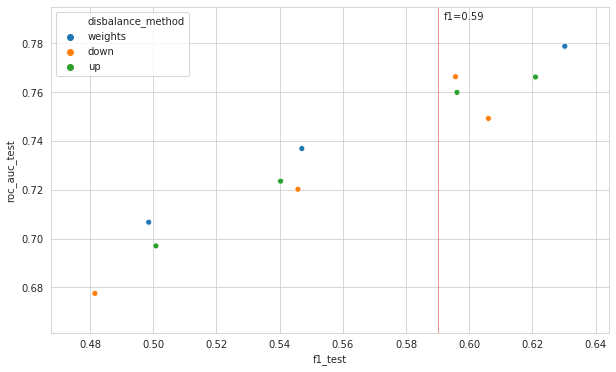

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='f1_test', y='roc_auc_test', hue='disbalance_method', data=total_results)
plt.axvline(.59, linewidth=.5, color='tab:red')
plt.text(.592, .79, 'f1=0.59')

plt.show()

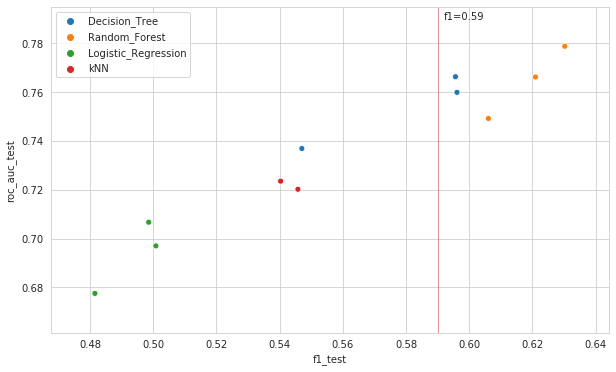

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='f1_test', y='roc_auc_test', hue=total_results.index, data=total_results)
plt.axvline(.59, linewidth=.5, color='tab:red')
plt.text(.592, .79, 'f1=0.59')

plt.show()

- Хорошо видны результаты обучения моделей:
    1. 5 моделей смогли показать результат по f1 выше требуемого 0.59: все модели Random Forest и две модели Decision Tree (с увеличением и уменьшением выборки)
    2. Для разных алгоритмов разные методы решают проблему дисбаланса классов
    3. Для данной задачи плохо сработали модели логистической регрессии
    4. Результаты моделей находятся в 3 разных кластерах, которые образуются видимо не по используемым алгоритмам и методам борьбы с дисбалансом, а по другим признакам

- Для пяти лучших моделей посмотрим отдельно кривые ROC

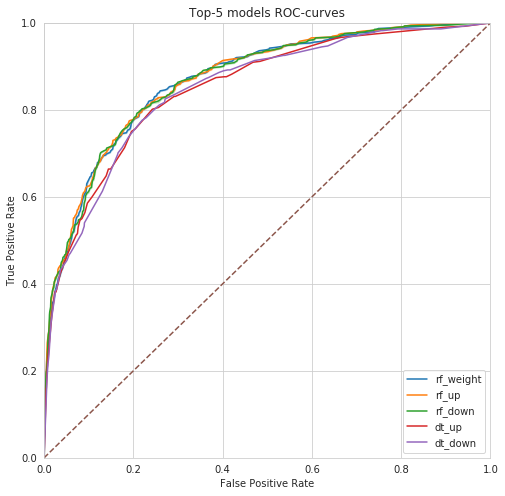

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

for model in [('rf_weight', rf_gscv_best_model), 
              ('rf_up', mod_up_rf), 
              ('rf_down', mod_down_rf), 
              ('dt_up', mod_up_dt), 
              ('dt_down', mod_down_dt)
             ]:
    clf = model[1]
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
    sns.lineplot(fpr, tpr, ax=ax, label=model[0])
    
ax.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.title('Top-5 models ROC-curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

- Хорошо видно, что в целом и модели случайного леса относительно друг друга, и модели дерева решений относительно друг друг, ведут себя практически идентично вне зависимости от выбранного метода борьбы с дисбалансами классов - итоговая разница минимальна

- Финальной моделью выбирается модель **Random Forest с использованием весов для классов**, значение ее f1-меры выше требуемого граничного значения 0.59 и равняется **0.63**

## Вывод

1. На имеющихся данных протестированы 4 разных модели, подходящие для задачи бинарной классификации:
    - DecisionTreeClassifier
    - RandomForestClassifier
    - LogisticRegression
    - KNeighborsClassifier
2. На каждой из моделей были протестированы 3 разных метода борьбы с дисбалансом классов:
    - Присвоение весов классам
    - Downsampling
    - Upsampling
3. Для каждого метода борьбы найдены наилучшие параметры
4. 5 моделей смогли показать результат по f1-мере выше требуемого граничного значения 0.59
5. Метрика roc auc имеет хорошую прямую зависимость с f1-мерой
6. Финальной моделью выбирается модель **Random Forest с использованием весов для классов: f1 = 0.63**